In [1]:
import numpy as np

import scipy as sp

In [3]:
sp.__version__

'1.4.1'

In [3]:
# 读写wav无损音频文件
from scipy.io import wavfile

scipy.fftpack模块用来计算快速傅里叶变换
<br>速度比传统傅里叶更快，是对之前算法的改进
<br>图片是二维数据，注意使用fftpack的二维转变方法

In [6]:
# ifft2 inverse 反转
from scipy.fftpack import fft2,ifft2

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
moon.shape

(256, 522, 3)

In [35]:
moon

array([[[ 79,  79,  79],
        [ 94,  94,  94],
        [ 75,  75,  75],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       [[ 81,  81,  81],
        [ 96,  96,  96],
        [ 76,  76,  76],
        ...,
        [103, 103, 103],
        [105, 105, 105],
        [105, 105, 105]],

       [[ 85,  85,  85],
        [ 98,  98,  98],
        [ 77,  77,  77],
        ...,
        [103, 103, 103],
        [ 99,  99,  99],
        [ 99,  99,  99]],

       ...,

       [[ 99,  99,  99],
        [114, 114, 114],
        [ 94,  94,  94],
        ...,
        [211, 211, 211],
        [194, 194, 194],
        [169, 169, 169]],

       [[ 89,  89,  89],
        [112, 112, 112],
        [102, 102, 102],
        ...,
        [212, 212, 212],
        [196, 196, 196],
        [171, 171, 171]],

       [[ 78,  78,  78],
        [108, 108, 108],
        [106, 106, 106],
        ...,
        [211, 211, 211],
        [191, 191, 191],
        [166, 166, 166]]

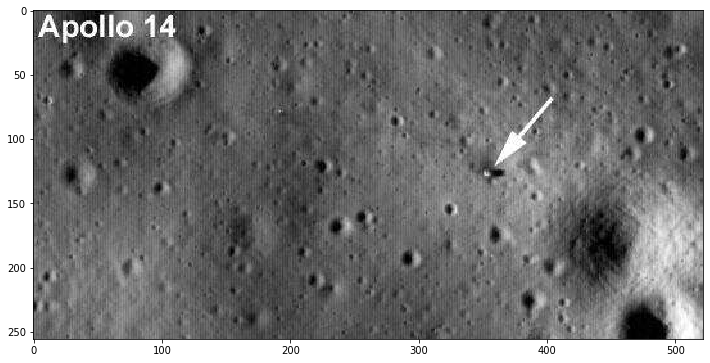

In [44]:
moon = plt.imread('./moonlanding.jpg')
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap=plt.cm.gray)

In [17]:
# 127548是左上顶点的频率
moon_fft = fft2(moon)
moon_fft

array([[[127548.           -0.j        ,      0.           +0.j        ,
              0.           -0.j        ],
        [ -6455.6041641   +73.10340197j,      0.           +0.j        ,
              0.           -0.j        ],
        [   796.68580626 -322.9969485j ,      0.           +0.j        ,
              0.           -0.j        ],
        ...,
        [ -3974.46829251-3907.33614242j,      0.           +0.j        ,
              0.           -0.j        ],
        [   796.68580626 +322.9969485j ,      0.           +0.j        ,
              0.           -0.j        ],
        [ -6455.6041641   -73.10340197j,      0.           +0.j        ,
              0.           -0.j        ]],

       [[126723.           -0.j        ,      0.           +0.j        ,
              0.           -0.j        ],
        [ -6654.17153111 +342.96583247j,      0.           +0.j        ,
              0.           -0.j        ],
        [   470.71638497 +600.68593611j,      0.           +0.j  

In [18]:
# 计算所有数据波动频率的平均值
np.abs(moon_fft).mean()

495.20038133473344

In [19]:
# 大于10倍平均值波动，波动比较大，过滤掉
# 500
cond = np.abs(moon_fft) > 500
cond

array([[[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       ...,

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True, False, False]],

       [[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        ...,
        [ True, False, False],
        [ True, False, False],
        [ True,

In [20]:
# 过滤重新复制，变成常量0
# 最好变成平均值
moon_fft[cond] = 495

In [21]:
# ifft2：将频域----->时域（肉眼可见的图片）
moon_result = ifft2(moon_fft)
moon_result

array([[[106.54537795-5.44477192e-17j, 106.54537795-5.44477192e-17j,
         106.54537795-5.44477192e-17j],
        [ 20.3744775 -1.45193918e-16j,  20.3744775 -1.45193918e-16j,
          20.3744775 -1.45193918e-16j],
        [  1.29562222+6.26148771e-16j,   1.29562222+6.26148771e-16j,
           1.29562222+6.26148771e-16j],
        ...,
        [  1.51113945-3.72962058e-16j,   1.51113945-3.72962058e-16j,
           1.51113945-3.72962058e-16j],
        [  3.91472075-1.14275622e-15j,   3.91472075-1.14275622e-15j,
           3.91472075-1.14275622e-15j],
        [ 13.32543584+5.32187452e-16j,  13.32543584+5.32187452e-16j,
          13.32543584+5.32187452e-16j]],

       [[ 87.69191431+6.35223391e-17j,  87.69191431+6.35223391e-17j,
          87.69191431+6.35223391e-17j],
        [ 22.90283429-1.45193918e-16j,  22.90283429-1.45193918e-16j,
          22.90283429-1.45193918e-16j],
        [  9.21821503-1.72417778e-16j,   9.21821503-1.72417778e-16j,
           9.21821503-1.72417778e-16j],
    

In [22]:
# real：虚数变成实数
moon2=np.real(moon_result)
moon2.shape

(256, 522, 3)

In [23]:
moon3 = np.abs(moon2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


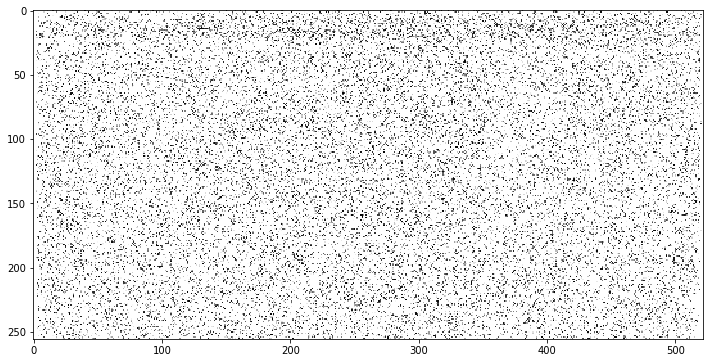

In [24]:
plt.figure(figsize=(12,9))

# moon3+数字-->变白
plt.imshow(moon3,cmap=plt.cm.gray)

积分操作

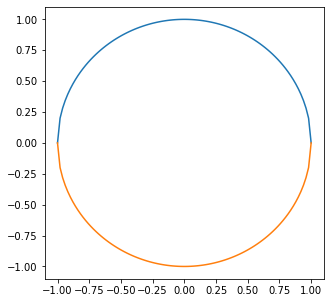

In [12]:
# X**2 + Y**2 = 1
# Y = (1-X**2)**0.5
c = lambda x:(1-x**2)**0.5
x = np.linspace(-1,1,100)
y = c(x)
# 没有plt.figure(figsize=(5,5))，将会显示椭圆，
plt.figure(figsize=(5,5))
plt.plot(x,y)
plt.plot(x,-y)

In [13]:
from scipy import integrate

In [14]:
# 半圆的面积，r=1，s=pi/2
integrate.quad(c,-1,1)

(1.5707963267948986, 1.0002356720661965e-09)

Scipy文件输入/输出

随机生成数组，使用scipy中的io.savemat()保存
<br>文件格式是.mat,标准的二进制文件

In [15]:
from scipy import io

In [25]:
moon2

array([[[106.54537795, 106.54537795, 106.54537795],
        [ 20.3744775 ,  20.3744775 ,  20.3744775 ],
        [  1.29562222,   1.29562222,   1.29562222],
        ...,
        [  1.51113945,   1.51113945,   1.51113945],
        [  3.91472075,   3.91472075,   3.91472075],
        [ 13.32543584,  13.32543584,  13.32543584]],

       [[ 87.69191431,  87.69191431,  87.69191431],
        [ 22.90283429,  22.90283429,  22.90283429],
        [  9.21821503,   9.21821503,   9.21821503],
        ...,
        [ -4.60027099,  -4.60027099,  -4.60027099],
        [ 10.90973732,  10.90973732,  10.90973732],
        [ 29.1737941 ,  29.1737941 ,  29.1737941 ]],

       [[ 95.29021117,  95.29021117,  95.29021117],
        [ 22.9479364 ,  22.9479364 ,  22.9479364 ],
        [ 14.2259623 ,  14.2259623 ,  14.2259623 ],
        ...,
        [ -7.55534464,  -7.55534464,  -7.55534464],
        [ 12.97864308,  12.97864308,  12.97864308],
        [ 24.59837747,  24.59837747,  24.59837747]],

       ...,

      

In [26]:
io.savemat('moon.mat',mdict={'moon':moon2})

In [27]:
io.loadmat('./moon.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Jun 23 22:16:36 2020',
 '__version__': '1.0',
 '__globals__': [],
 'moon': array([[[106.54537795, 106.54537795, 106.54537795],
         [ 20.3744775 ,  20.3744775 ,  20.3744775 ],
         [  1.29562222,   1.29562222,   1.29562222],
         ...,
         [  1.51113945,   1.51113945,   1.51113945],
         [  3.91472075,   3.91472075,   3.91472075],
         [ 13.32543584,  13.32543584,  13.32543584]],
 
        [[ 87.69191431,  87.69191431,  87.69191431],
         [ 22.90283429,  22.90283429,  22.90283429],
         [  9.21821503,   9.21821503,   9.21821503],
         ...,
         [ -4.60027099,  -4.60027099,  -4.60027099],
         [ 10.90973732,  10.90973732,  10.90973732],
         [ 29.1737941 ,  29.1737941 ,  29.1737941 ]],
 
        [[ 95.29021117,  95.29021117,  95.29021117],
         [ 22.9479364 ,  22.9479364 ,  22.9479364 ],
         [ 14.2259623 ,  14.2259623 ,  14.2259623 ],
         ...,
         [ -7.55

读写图片使用scipy中misc.imread()/imsave()

In [4]:
from scipy import misc

In [32]:
# 视频中的版本可以
cat = misc.imread('./cat.jpg')
cat

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [33]:
cat2 = misc.imrotate(cat,60)
plt.imshow(cat2)


AttributeError: module 'scipy.misc' has no attribute 'imrotate'

In [2]:
from scipy import ndimage

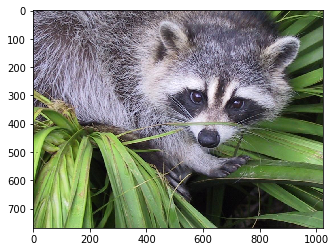

In [8]:
# 自带的图片，练习
face=misc.face()
plt.imshow(face)

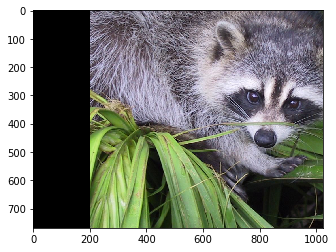

In [9]:
# 0 纯黑，255 纯白

face2 = ndimage.shift(face,shift=[0,200,0])
plt.imshow(face2)

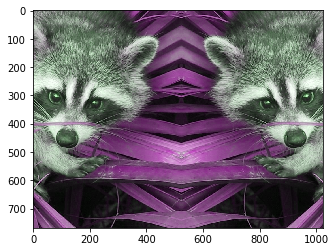

In [10]:
'''
mode : {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}, optional
    The `mode` parameter determines how the input array is extended
    beyond its boundaries. Default is 'constant'. Behavior for each valid
    value is as follows:

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel.

    'constant' (`k k k k | a b c d | k k k k`)
        The input is extended by filling all values beyond the edge with
        the same constant value, defined by the `cval` parameter.

    'nearest' (`a a a a | a b c d | d d d d`)
        The input is extended by replicating the last pixel.

    'mirror' (`d c b | a b c d | c b a`)
        The input is extended by reflecting about the center of the last
        pixel.

    'wrap' (`a b c d | a b c d | a b c d`)
        The input is extended by wrapping around to the opposite edge.
'''
face2 = ndimage.shift(face,shift=[0,-500,3],mode = 'mirror')
plt.imshow(face2)

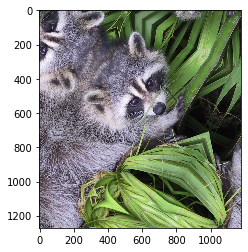

In [11]:
face3 = ndimage.rotate(face,angle = 60,mode = 'mirror')
plt.imshow(face3)

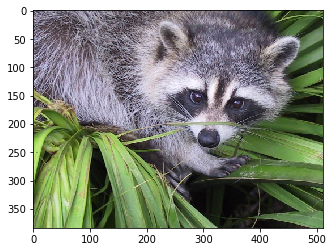

In [14]:
# zoom缩放图片:0.1表示为原来的1/10
# 1 -3维or 1/3(黑白)-1维，后者需使用reshape降维度
face4 = ndimage.zoom(face,zoom=[0.5,0.5,1])
plt.imshow(face4)

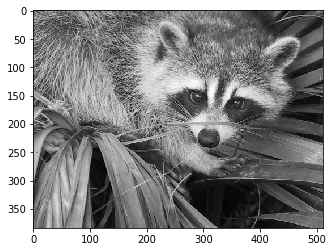

In [19]:
face4 = ndimage.zoom(face,zoom=[0.5,0.5,1/3])
plt.imshow(face4.reshape(384,512),cmap=plt.cm.gray)

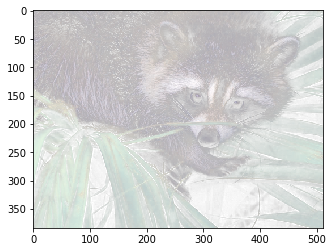

In [41]:
face4 = ndimage.zoom(face,zoom=[0.5,0.5,4/3])
# face4.shape=(384,512,4)---->四维，透明度
plt.imshow(face4,cmap=plt.cm.gray)

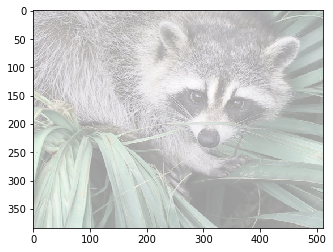

In [42]:
# face4切片中最后一个值：0-红；1-绿；2-蓝；3-透明度
face4[:,:,3] = 100
plt.imshow(face4)

切割图片

In [ ]:
ndimage

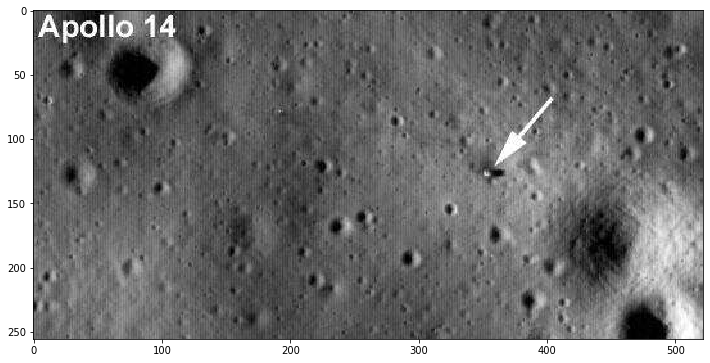

In [45]:
plt.figure(figsize=(12,9))
plt.imshow(moon,cmap=plt.cm.gray)

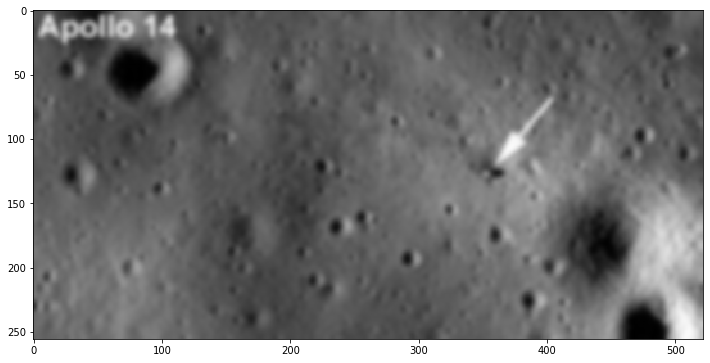

In [51]:
# 高斯分布，正太分布，概率不一样
# sigma=2调整清晰度
# 与misc.imfilter(moon,'smooth')效果一样
moon5 = ndimage.gaussian_filter(moon,sigma=2)
plt.figure(figsize=(12,9))
plt.imshow(moon5,cmap=plt.cm.gray)

中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

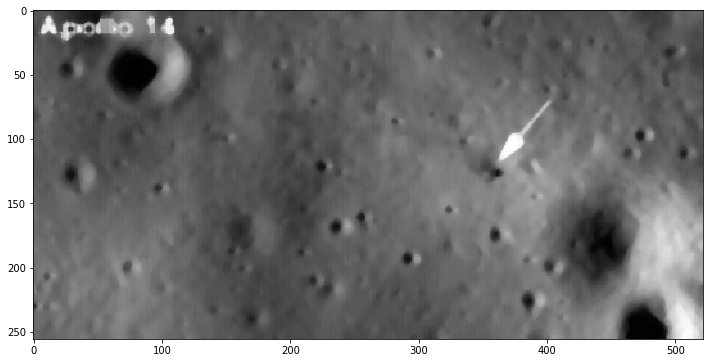

In [55]:
# 选一片得到中位数据，代替这片的其他数据
moon6 = ndimage.median_filter(moon,size=7)
plt.figure(figsize=(12,9))
plt.imshow(moon6,cmap=plt.cm.gray)

signal维纳滤波mysize:滤镜尺寸的标量

In [57]:
# matrix矩阵
from scipy import matrix

In [58]:
A = matrix(np.random.randint(0,10,size=(4,5)))
A

matrix([[8, 8, 7, 4, 9],
        [8, 1, 7, 2, 9],
        [9, 6, 0, 7, 0],
        [7, 6, 9, 1, 1]])

In [59]:
B =  matrix(np.random.randint(0,10,size=(5,4)))
B

matrix([[2, 2, 9, 5],
        [3, 9, 6, 0],
        [6, 7, 7, 0],
        [8, 6, 4, 7],
        [7, 6, 2, 1]])

In [60]:
A.dot(B)

matrix([[177, 215, 203,  77],
        [140, 140, 153,  63],
        [ 92, 114, 145,  94],
        [101, 143, 168,  43]])

In [61]:

S =  np.random.randint(0,100,size=(10000,10000))
S

array([[94, 65, 84, ..., 16, 11, 98],
       [86, 54, 24, ..., 57,  1, 34],
       [88, 96, 27, ..., 91, 52, 92],
       ...,
       [85, 68, 81, ..., 91, 84, 55],
       [77, 89, 85, ..., 13, 67, 86],
       [95, 81, 67, ...,  2, 77, 70]])

In [62]:
np.save('./S.npy',S)
# 此文件大小400M

In [63]:
# 每个元素32bit
S.dtype

dtype('int32')

In [64]:
#除以两个1024之后变成M Byte
10000*10000*32/8/1024/1024

381.4697265625

In [66]:
S[S < 98] = 0
# dense稠密
S

array([[ 0,  0,  0, ...,  0,  0, 98],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [67]:
np.save('./S2.npy',S)

In [68]:
# 稀松矩阵，大部分是0，小部分是非零数据
from scipy import sparse

In [70]:
S1 = sparse.csc_matrix(S)
S1

<10000x10000 sparse matrix of type '<class 'numpy.intc'>'
	with 2001758 stored elements in Compressed Sparse Column format>

In [71]:
# 非零数据记录，零就不记录
print(S1)

  (71, 0)	98
  (93, 0)	99
  (150, 0)	99
  (171, 0)	99
  (199, 0)	98
  (234, 0)	98
  (261, 0)	99
  (266, 0)	98
  (439, 0)	98
  (504, 0)	98
  (548, 0)	99
  (571, 0)	98
  (588, 0)	98
  (607, 0)	99
  (637, 0)	98
  (678, 0)	99
  (680, 0)	98
  (697, 0)	99
  (718, 0)	99
  (763, 0)	98
  (893, 0)	99
  (1086, 0)	98
  (1123, 0)	99
  (1240, 0)	99
  (1256, 0)	98
  :	:
  (8811, 9999)	98
  (8822, 9999)	99
  (8874, 9999)	99
  (8884, 9999)	99
  (8940, 9999)	98
  (8965, 9999)	99
  (9023, 9999)	99
  (9031, 9999)	99
  (9053, 9999)	98
  (9073, 9999)	99
  (9231, 9999)	98
  (9257, 9999)	98
  (9335, 9999)	98
  (9469, 9999)	99
  (9477, 9999)	98
  (9502, 9999)	99
  (9526, 9999)	99
  (9551, 9999)	98
  (9562, 9999)	98
  (9585, 9999)	98
  (9650, 9999)	99
  (9667, 9999)	98
  (9681, 9999)	98
  (9929, 9999)	99
  (9940, 9999)	98


In [72]:
#./sparse.npz 文件大大缩小
sparse.save_npz('./sparse.npz',S1)

In [73]:
# row行
S2 = sparse.csr_matrix(S)
S2

<10000x10000 sparse matrix of type '<class 'numpy.intc'>'
	with 2001758 stored elements in Compressed Sparse Row format>

In [74]:
print(S2)

  (0, 81)	98
  (0, 193)	99
  (0, 211)	98
  (0, 254)	99
  (0, 285)	99
  (0, 427)	98
  (0, 455)	99
  (0, 521)	99
  (0, 532)	99
  (0, 560)	98
  (0, 612)	98
  (0, 623)	98
  (0, 674)	99
  (0, 821)	98
  (0, 847)	98
  (0, 855)	98
  (0, 880)	99
  (0, 1054)	99
  (0, 1067)	98
  (0, 1068)	99
  (0, 1089)	98
  (0, 1093)	99
  (0, 1274)	99
  (0, 1290)	99
  (0, 1298)	98
  :	:
  (9999, 8850)	98
  (9999, 8904)	99
  (9999, 8948)	99
  (9999, 9073)	98
  (9999, 9076)	98
  (9999, 9091)	99
  (9999, 9092)	99
  (9999, 9130)	99
  (9999, 9151)	99
  (9999, 9174)	99
  (9999, 9389)	98
  (9999, 9411)	99
  (9999, 9494)	98
  (9999, 9528)	99
  (9999, 9594)	99
  (9999, 9694)	99
  (9999, 9698)	98
  (9999, 9803)	98
  (9999, 9815)	98
  (9999, 9821)	98
  (9999, 9855)	98
  (9999, 9882)	98
  (9999, 9884)	98
  (9999, 9944)	98
  (9999, 9991)	99
